In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../Python/ACMB_dict')
import KID_model_functions as kids
from astropy import units as u
from astropy import constants as c

In [9]:
alpha = 0.8*u.dimensionless_unscaled
Tstage = 0.215*u.K
f = 200*u.MHz
Tc = 1.4*u.K
tau_max = 35*u.microsecond
n_star = 1318*(np.power(u.micron,-3))
Pinc = 0.5*u.pW
V = 76*np.power(u.micron,3)
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
eta_opt = 0.17*u.dimensionless_unscaled
N0=kids.N0_Al
n_gamma=0

Pinc = np.linspace(0.01,2.5,20)*u.pW
sxxtest = kids.Sxx_tot(alpha,Tstage,f,Tc,tau_max,n_star,Pinc,V,eta_pb,nu_opt,eta_opt,N0,n_gamma)

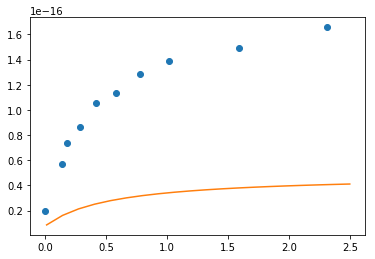

In [19]:
plt.plot(P_inc_f5,Sxx_f5,'o')
plt.plot(Pinc,sxxtest)

In [11]:
Tstage_f3, x_f3, invQi_f3 = np.loadtxt('LTDData_x_invQi_vs_Tstage.txt',unpack=True,comments=';')

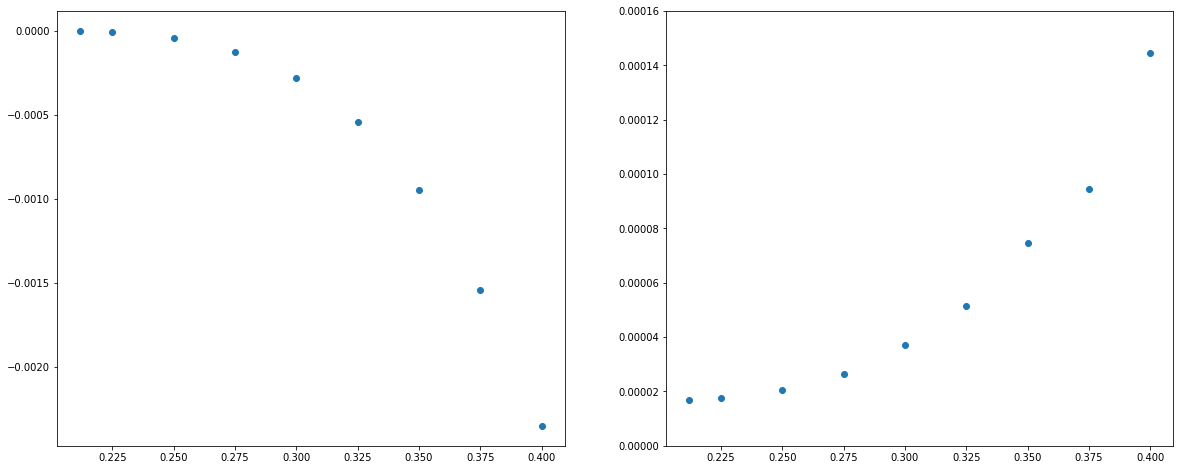

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(Tstage_f3,x_f3,'o')
plt.subplot(122)
plt.plot(Tstage_f3,invQi_f3,'o')
plt.ylim([0,1.6e-4])
plt.show()

In [13]:
Tstage_f4, Sxx_f4, Sxx_err_f4 = np.loadtxt('LTDData_Sxx_vs_Tstage.txt', unpack=True,comments=';')

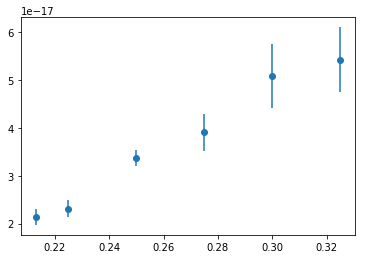

In [14]:
plt.errorbar(Tstage_f4, Sxx_f4, marker='o', yerr=Sxx_err_f4, ls = 'none')
plt.show()

In [15]:
P_inc_f5, x_f5 = np.loadtxt('LTDData_x_vs_Pinc.txt',unpack=True,comments=';')

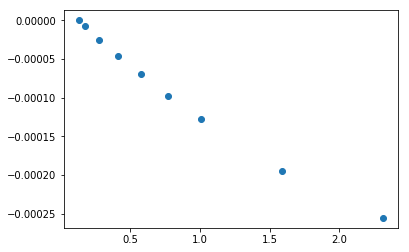

In [16]:
plt.plot(P_inc_f5,x_f5,'o')

In [17]:
P_inc_f5, Sxx_f5 = np.loadtxt('LTDData_Sxx_vs_Pinc.txt',unpack=True,comments=';')

In [20]:
pwd

'/Users/jaguirre/PyModules/STARsoft/LTD'

In [39]:
icm_filt, trans_filt = np.loadtxt('../TestSetup/BandpassFilter.txt',unpack=True,delimiter=',')
indx = np.argsort(icm_filt)
freq_filt = (icm_filt[indx]*u.k).to(u.THz,equivalencies=u.spectral())
trans_filt = trans_filt[indx]
from scipy.interpolate import CubicSpline
filt = CubicSpline(freq_filt.value,trans_filt)
freq_filt.value.max()

1.0321314702515598

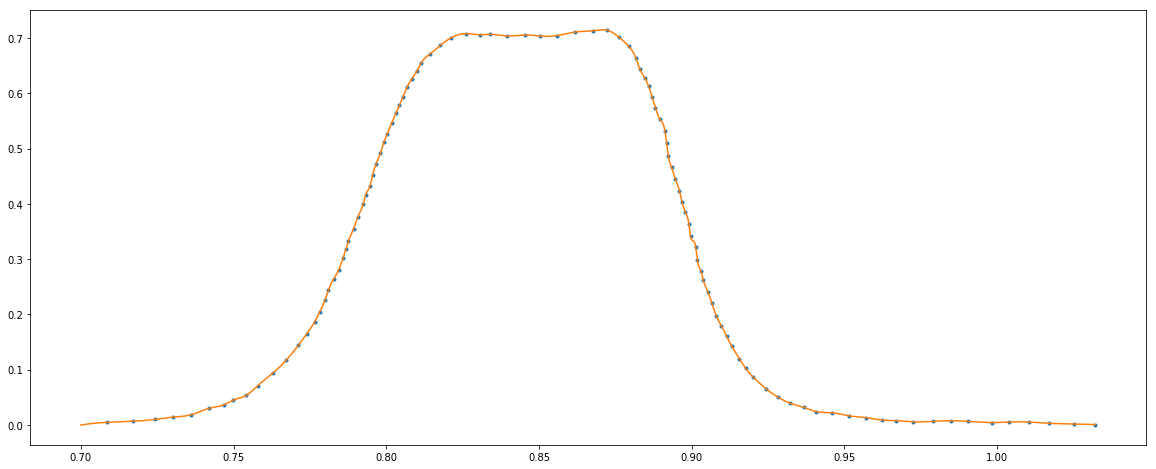

In [40]:
plt.figure(figsize=(20,8))
plt.plot(freq_filt, trans_filt,'.')
freq_fine = np.linspace(0.7,freq_filt.value.max(),num=10000)
plt.plot(freq_fine,filt(freq_fine))
plt.show()